# About
Notebook simulating [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life).

In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors, animation, rc
from matplotlib.ticker import MultipleLocator, NullFormatter

# Game Tick
Conway's game of life has the following 3 rules:
- Any live cell with two or three live neighbours survives.
- Any dead cell with three live neighbours becomes a live cell.
- All other live cells die in the next generation. Similarly, all other dead cells stay dead.

Every game tick every cell in the grid is checked against the 3 rules and a new
grid is created.

In [2]:
class ConwaysGame:
    """Conway's Game of Life class which provides generator for iterating ticks."""
    
    def __init__(self, start: np.ndarray, num_ticks: int):
        self._length = int(num_ticks)
        self._grid = start.copy()
    
    def __len__(self):
        return self._length
    
    @staticmethod
    def game_tick(grid: np.ndarray) -> np.ndarray:
        """Calculate next game grid for Conway's game of life."""
        new_grid = np.zeros_like(grid)
        for y in range(grid.shape[0]):
            for x in range(grid.shape[1]):
                curr = grid[y, x]
                grid_sum = np.sum(grid[y-1:y+2, x-1:x+2])
                if curr == 0 and grid_sum == 3:
                    # Dead becomes alive if 3 neighbours are alive
                    new_grid[y, x] = 1
                elif curr == 1 and (grid_sum - 1) in (2, 3):
                    # Alive stays alive if 2/3 neighbours are alive,
                    # subtracting 1 because current cell is 1
                    new_grid[y, x] = 1
        return new_grid

    def __iter__(self):
        """Generator to loop through number of ticks for game."""
        for i in range(self._length + 1):
            yield i, self._grid
            self._grid = self.game_tick(self._grid)
    
    @property
    def grid(self):
        return self._grid

# Plotting Class
Class for plotting Conway's Game with matplotlib.

In [3]:
class PlotConway:
    """Class to manage creating the initial figure and updating it."""
    
    TITLE = "Conway's Game of Life"
    TITLE_FONT = {"fontsize": "xx-large"}
    
    def __init__(self, game: ConwaysGame):
        self.game = game
        self._init_figure()
        
    def _init_figure(self):
        self.fig, self.ax = plt.subplots(figsize=(10, 10))
        self.fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.95)
        # Setup grid and remove axis ticks
        self.ax.grid(True, which="both", color="white", linestyle="-")
        self.ax.tick_params(bottom=False, left=False)
        self.ax.xaxis.set_major_locator(MultipleLocator(1))
        self.ax.xaxis.set_major_formatter(NullFormatter())
        self.ax.yaxis.set_major_locator(MultipleLocator(1))
        self.ax.yaxis.set_major_formatter(NullFormatter())
        self.ax.set_title(f"{self.TITLE} - initial grid", self.TITLE_FONT)
        # Create initial plot with custom blue/green colormap
        cmap = colors.ListedColormap(["#4287f5", "#46e050"])
        norm = colors.BoundaryNorm([0, .5, 1], cmap.N)
        self.image = self.ax.imshow(
            self.game.grid,
            aspect="equal",
            cmap=cmap,
            extent=(0, self.game.grid.shape[0], self.game.grid.shape[1], 0)
        )
    
    def _update(self, frame):
        i, grid = frame
        self.image.set_data(grid)
        self.ax.set_title(f"{self.TITLE} - tick {i}", self.TITLE_FONT)
        return (self.image,)
    
    def animate(self, interval: int=1000):
        """Create animation for the given game."""
        print(f"Number of ticks: {len(self.game)}")
        return animation.FuncAnimation(
            self.fig,
            self._update,
            frames=self.game.__iter__,
            interval=interval,
            blit=True,
            repeat=False,
        )

# Initial Grid
Creating the starting grid for the game.

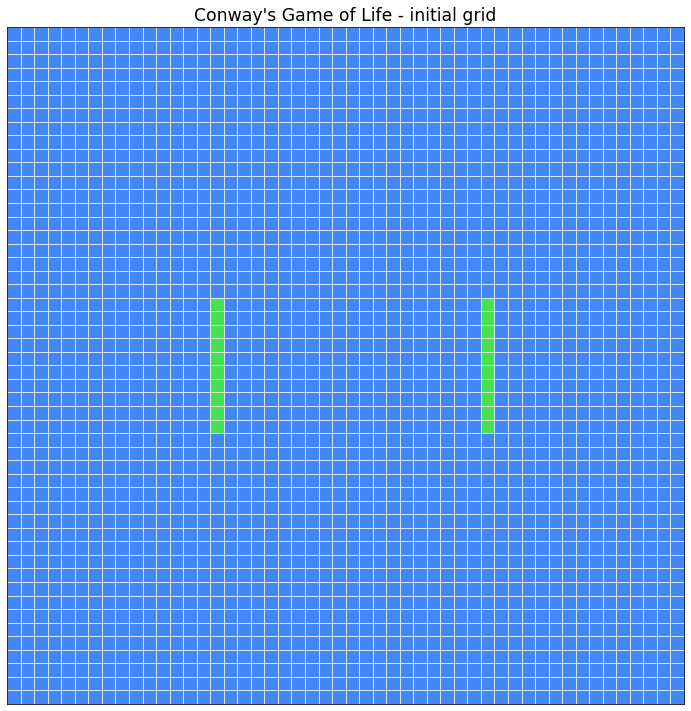

In [4]:
# Create initial grid
N = 50
init_grid = np.zeros((N, N))
init_grid[20:30, 15] = 1
init_grid[20:30, 35] = 1

# Create figure with initial grid
game1 = ConwaysGame(init_grid, 100)
conway_plot = PlotConway(game1)
plt.show()

# Playing Game
Iterating through N ticks in the game.

In [5]:
rc("animation", html="html5")
anim = conway_plot.animate()
display(anim)

Number of ticks: 100
